# Exc Data structuring

In [2]:
%matplotlib inline 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6b

In [32]:
def weerbericht(url):
    df_w = pd.read_csv(url,
                         compression='gzip', 
                         header=None).iloc[:,:4]
    df_w.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    df_w['obs_value'] = df_w['obs_value'] / 10
    df_w.datetime = pd.to_datetime(df_w.datetime.astype(str))
    month = df_w.datetime.dt.month
    df_w = df_w.assign(Month=month)
    df_w = df_w.set_index(pd.DatetimeIndex(df_w.datetime))
    country_id = df_w.station.str[:3]
    df_w = df_w.assign(Country_id=country_id)
    df_w = df_w.loc[df_w['obs_type'] == 'TMAX']
    return df_w
    
dataframe = weerbericht('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz')
dataframe.head()

,station,datetime,obs_type,obs_value,Month,Country_id
datetime,,,,,,
1864-01-01,ITE00100550,1864-01-01,TMAX,1.0,1,ITE
1864-01-01,ASN00086071,1864-01-01,TMAX,21.4,1,ASN
1864-01-01,CA006158350,1864-01-01,TMAX,1.1,1,CA0
1864-01-01,EIE00101859,1864-01-01,TMAX,9.4,1,EIE
1864-01-01,BE000006447,1864-01-01,TMAX,-2.3,1,BE0


In [35]:
newdataframe = dataframe.loc[dataframe['station'] == 'ITE00100550']
newdataframe.head()

,station,datetime,obs_type,obs_value,Month,Country_id
datetime,,,,,,
1864-01-01,ITE00100550,1864-01-01,TMAX,1.0,1,ITE
1864-01-02,ITE00100550,1864-01-02,TMAX,0.8,1,ITE
1864-01-03,ITE00100550,1864-01-03,TMAX,-2.8,1,ITE
1864-01-04,ITE00100550,1864-01-04,TMAX,0.0,1,ITE
1864-01-05,ITE00100550,1864-01-05,TMAX,-1.9,1,ITE


In [41]:
tempdata = newdataframe\
            .groupby(newdataframe.Month)\
            ['obs_value']\
            .describe()
tempdata.head()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,31.0,-0.077419,3.064605,-6.3,-2.200,0.00,1.90,5.3
2,29.0,4.134483,3.031652,-1.8,1.500,4.40,6.80,8.4
3,31.0,12.200000,2.780408,7.9,10.050,12.10,14.15,18.0
4,30.0,16.243333,4.487199,6.3,14.425,16.25,18.40,25.1
5,31.0,21.470968,3.312622,14.0,19.500,21.10,23.80,27.0


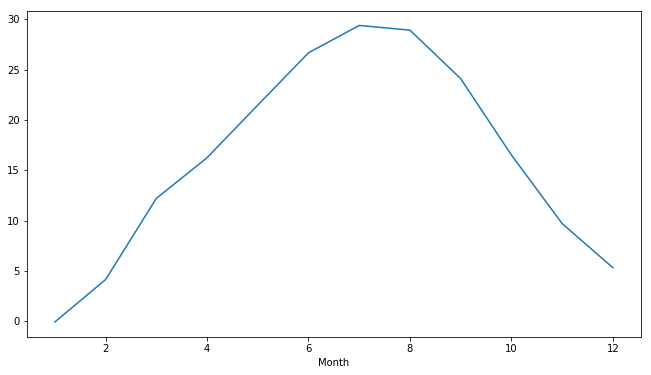

In [56]:
tempdata['mean'].plot()

In [61]:
df1864 = weerbericht('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz')
df1865 = weerbericht('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1865.csv.gz')
df1866 = weerbericht('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1866.csv.gz')
df1867 = weerbericht('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1867.csv.gz')

In [65]:
df_total = pd.concat([df1864, df1865, df1866, df1867])
df_total.tail()

,station,datetime,obs_type,obs_value,Month,Country_id
datetime,,,,,,
1867-12-31,CA006101872,1867-12-31,TMAX,-3.9,12,CA0
1867-12-31,CA006137735,1867-12-31,TMAX,-1.1,12,CA0
1867-12-31,ASN00090015,1867-12-31,TMAX,16.7,12,ASN
1867-12-31,UK000056225,1867-12-31,TMAX,-0.5,12,UK0
1867-12-31,SZ000006717,1867-12-31,TMAX,-15.8,12,SZ0


In [76]:
urltext = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'
newdata = pd.read_fwf(urltext, header=None)
newdata.head()

,0,1,2,3,4,5,6,7
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,NaN,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,NaN,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,NaN,NaN,41217.0


In [79]:
newcolumns = ['station', 'latitude', 'longitude', 'elevation', 'state', 'name', 'gsn flag', 'wmo id']
newdata.columns = newcolumns
newdata.head()

,station,latitude,longitude,elevation,state,name,gsn flag,wmo id
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,NaN,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,NaN,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,NaN,NaN,41217.0


In [84]:
total_df = pd.merge(df_total, newdata, left_on='station', right_on='station')
total_df.tail()
total_df.shape

(29638, 13)

## Exc session 8

In [30]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize

url = 'https://job.jobnet.dk/CV/FindWork/Search'
response = requests.get(url)
data = json.loads(response.text)
data.keys()

dict_keys(['Expression', 'Facets', 'JobPositionPostings', 'TotalResultCount'])

In [204]:
JPP = pd.DataFrame.from_dict(data['JobPositionPostings'])

In [205]:
JPP

,AnonymousEmployer,AssignmentStartDate,AutomatchType,Country,EmploymentType,HasLocationValues,HiringOrgCVR,HiringOrgName,ID,IsExternal,...,UseWorkPlaceAddressForJoblog,Weight,WorkHours,WorkPlaceAbroad,WorkPlaceAddress,WorkPlaceCity,WorkPlaceNotStatic,WorkPlaceOtherAddress,WorkPlacePostalCode,WorkplaceID
0,False,0001-01-01T00:00:00,0,Danmark,,True,78642718,Strandlyst Boliger,4864923,False,...,True,1.0,Fuldtid,False,Strandstien 1,Hesselager,False,False,5874,63029
1,False,0001-01-01T00:00:00,0,Danmark,,True,32568289,SCANPEOPLE ApS,4863539,False,...,False,1.0,Fuldtid,False,,,False,True,,84072
2,False,0001-01-01T00:00:00,0,Danmark,,True,28689276,Kongsvang Rengøringsservice,4864499,False,...,True,1.0,Deltid,False,Klamsagervej 2,Åbyhøj,False,False,8230,76415
3,False,0001-01-01T00:00:00,0,Danmark,,True,34605416,HANDICAPFORMIDLINGEN ApS,4843290,False,...,False,1.0,Fuldtid,False,,,False,True,,107523
4,False,0001-01-01T00:00:00,0,Danmark,,True,33647921,UGGERHØJ AARHUS A/S,4853620,False,...,True,1.0,Fuldtid,False,Slet Parkvej 2,Højbjerg,False,False,8270,123080
5,False,0001-01-01T00:00:00,0,Danmark,,True,29189684,Middelfart Kommune,4855150,False,...,True,1.0,Fuldtid,False,Vestre Hougvej 70,Middelfart,False,False,5500,0
6,False,0001-01-01T00:00:00,0,Danmark,,True,34474540,HR-Skyen,4854233,False,...,True,1.0,Fuldtid,False,Østre Stationsvej 27,Odense C,False,False,5000,108648
7,False,0001-01-01T00:00:00,0,Danmark,,True,27186343,Røde Kors Børnehave,4864214,False,...,True,1.0,Deltid,False,Margrethevej 1,Fjenneslev,False,False,4173,117657
8,False,0001-01-01T00:00:00,0,Danmark,,True,20423609,4tools.dk v/Robert Kirkegård,4843738,False,...,True,1.0,Deltid,False,Jernvedvej 1,Gørding,False,False,6690,92512
9,False,0001-01-01T00:00:00,0,Grækenland,,True,38046721,Scanjob ApS,4802083,False,...,False,1.0,Fuldtid,True,,,False,False,,121128


In [40]:
TRC = data['TotalResultCount']
TRC

15786

In [106]:
urllist = []

for no in range(0, 15786, 20):
    url = 'https://job.jobnet.dk/CV/FindWork?Offset=' + str(no) + '&SortValue=BestMatch'
    urllist.append(url)

In [179]:
urllist[1:5]

['https://job.jobnet.dk/CV/FindWork?Offset=20&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=40&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=60&SortValue=BestMatch',
 'https://job.jobnet.dk/CV/FindWork?Offset=80&SortValue=BestMatch']

In [114]:
import random
sample_urls = random.sample(urllist, 20)

In [195]:
html = []

for i in sample_urls:
    response = requests.get(i)
    html.append(response.text)

In [198]:
html[1]

'\r\n\r\n<!DOCTYPE html>\r\n<html class="no-js jobnet" lang="da" data-build="2018.2.0.481" data-ng-app="Jobnet">\r\n<head data-jn-header-manager>\r\n    <meta charset="utf-8" />\r\n    \r\n    <title>Find job forside</title>\r\n    <base>\r\n    <meta name="description" content="" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\r\n    \r\n    <link href="/CV/bundles/jobnet/styles/themes/jqueryui?v=tnDXbSoBDWbbJp6Mq-7PNZ2WgEiO41s0WI3Jpab9v5k1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/styles/normalization?v=gSaZVVb1CJXExmQptCLxQuHgSC9psCRjimdEyAibz4E1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/styles/normalizationprint?v=oRijEx5qJuAAPi5Biy05nn2lsj7dhIKZLJ8zNwNOAZs1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/styles/core?v=gEmK_VEJLQaBS1uTctTtmhQ2UoWNFxuy7dzlVZjT91Q1" rel="stylesheet"/>\r\n\r\n    <link href="/CV/bundles/jobnet/styles/bootstrap?v=RUMgApkZUz7Ji1Kzr4Gatwh3A3qKsJmYkAuLW1ZABwE1" rel="sty

In [201]:
str_concat = "\n\n".join(html)
str_concat[1:50]

'\n\r\n<!DOCTYPE html>\r\n<html class="no-js jobnet" la'